In [1]:
import parse
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filenames = ['poses/bicep_bad_1', 'poses/bicep_bad_2', 'poses/bicep_bad_3', 'poses/bicep_bad_4', 'poses/bicep_bad_5', 'poses/bicep_bad_6', 'poses/bicep_bad_7', 'poses/bicep_bad_8', 'poses/bicep_bad_9', 'poses/bicep_good_1', 'poses/bicep_good_2', 'poses/bicep_good_3', 'poses/bicep_good_4', 'poses/bicep_good_5', 'poses/bicep_good_6']

# Get all the pose sequences from the parser
# TODO: save these in the future
all_ps = parse.main()

Starting PoseSequence 0
Filename: poses/bicep_bad_1
PoseSequence 0: Right arm


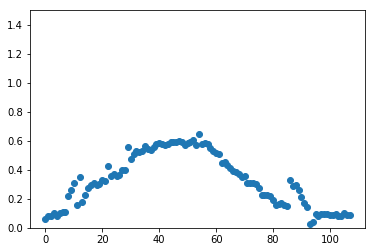

Starting PoseSequence 1
Filename: poses/bicep_bad_2
PoseSequence 1: Right arm


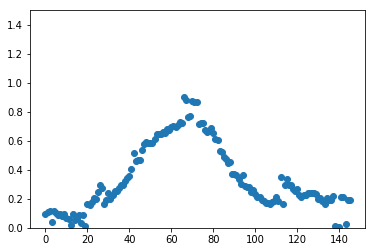

Starting PoseSequence 2
Filename: poses/bicep_bad_3
PoseSequence 2: Right arm


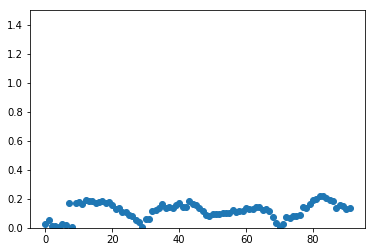

Starting PoseSequence 3
Filename: poses/bicep_bad_4
PoseSequence 3: Right arm


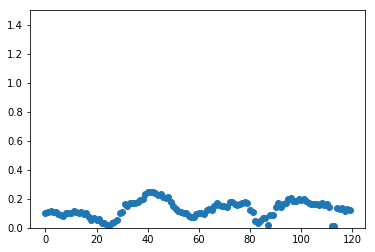

Starting PoseSequence 4
Filename: poses/bicep_bad_5
PoseSequence 4: Right arm


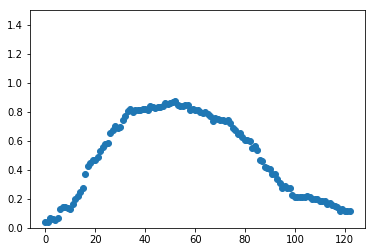

Starting PoseSequence 5
Filename: poses/bicep_bad_6
PoseSequence 5: Right arm


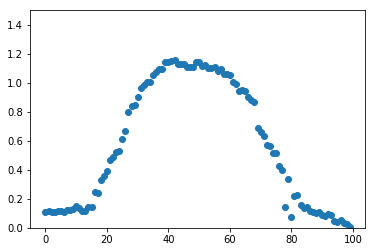

Starting PoseSequence 6
Filename: poses/bicep_bad_7
PoseSequence 6: Right arm


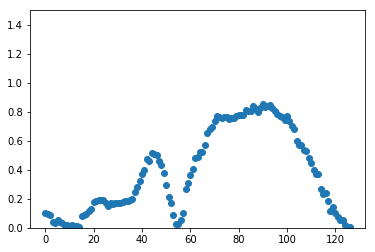

Starting PoseSequence 7
Filename: poses/bicep_bad_8
PoseSequence 7: Left arm


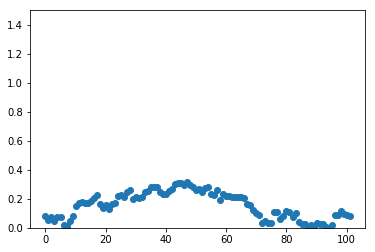

Starting PoseSequence 8
Filename: poses/bicep_bad_9
PoseSequence 8: Left arm


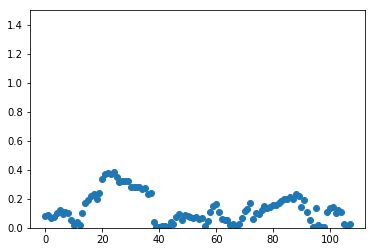

Starting PoseSequence 9
Filename: poses/bicep_good_1
PoseSequence 9: Right arm


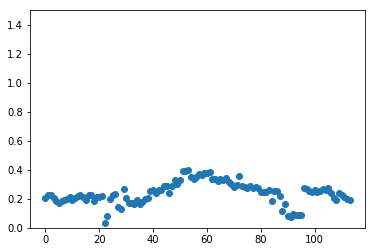

Starting PoseSequence 10
Filename: poses/bicep_good_2
PoseSequence 10: Right arm


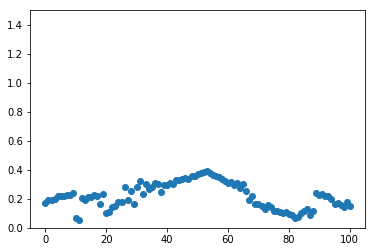

Starting PoseSequence 11
Filename: poses/bicep_good_3
PoseSequence 11: Right arm


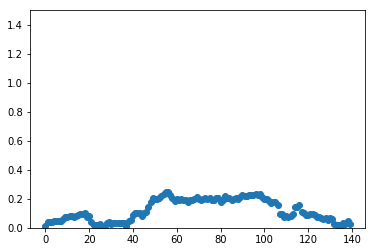

Starting PoseSequence 12
Filename: poses/bicep_good_4
PoseSequence 12: Right arm


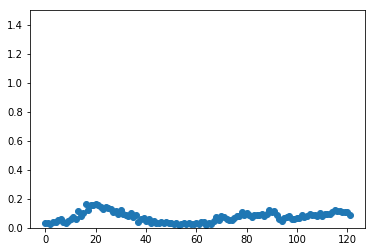

Starting PoseSequence 13
Filename: poses/bicep_good_5
PoseSequence 13: Left arm


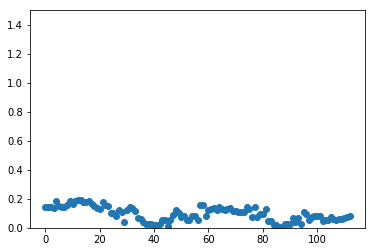

Starting PoseSequence 14
Filename: poses/bicep_good_6
PoseSequence 14: Left arm


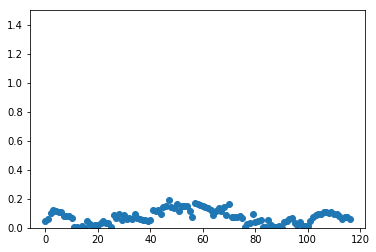

In [5]:
for i, ps in enumerate(all_ps):
    print("Starting PoseSequence {}".format(str(i)))
    print("Filename: {}".format(filenames[i]))
    # Given a PS, we first want to identify which arm is in the viewpoint
    # For every pose in the PS, count the number of times 
    # shoulder/elbow/wrist is 0 for both left and right side.

    # Count number of non-zeros in right and left
    right_ct, left_ct = 0, 0

    for pose in ps.poses:
        right_loc = [pose.rshoulder, pose.relbow, pose.rwrist]
        left_loc = [pose.lshoulder, pose.lelbow, pose.lwrist]
        for loc in right_loc:
            right_ct = right_ct + 1 if loc.x > 0 else right_ct
            right_ct = right_ct + 1 if loc.y > 0 else right_ct
        for loc in left_loc:
            left_ct = left_ct + 1 if loc.x > 0 else left_ct
            left_ct = left_ct + 1 if loc.y > 0 else left_ct

    # Check which side has less 0's. Deal with tiebreaking later
    side = "Right" if right_ct > left_ct else "Left"
    print("PoseSequence {}: {} arm".format(str(i), side))

    # Things we want to compute:
    # Vector of the upper arm (shoulder -> elbow)
    # Vector of the torso (neck -> hip)
    # Angle between upper arm and torso vector

    upper_arm_vectors = []
    torso_vectors = []
    upper_arm_torso_angle = []

    for pose in ps.poses:
        if side == "Right":
            joints = [pose.rshoulder, pose.relbow, pose.rwrist, pose.rhip]
        else:
            joints = [pose.lshoulder, pose.lelbow, pose.lwrist, pose.lhip]

        # Shoulder to elbow
        arm_vec = [joints[0].x - joints[1].x, joints[0].y - joints[1].y]
        upper_arm_vectors.append(arm_vec)

        # Neck to hip
        tor_vec = [pose.neck.x - joints[3].x, pose.neck.y - joints[3].y]
        torso_vectors.append(tor_vec)

        # Angle between upper arm and torso
        # Normalize to unit vectors
        arm_vec = arm_vec / np.linalg.norm(arm_vec)
        tor_vec = tor_vec / np.linalg.norm(tor_vec)
        angle = np.arccos(np.clip(np.dot(arm_vec, tor_vec), -1.0, 1.0))
        upper_arm_torso_angle.append(angle)
        
    upper_arm_vectors = np.array(upper_arm_vectors)
    torso_vectors = np.array(torso_vectors)
    upper_arm_torso_angle = np.array(upper_arm_torso_angle)
    plt.scatter(np.arange(upper_arm_torso_angle.shape[0]),upper_arm_torso_angle)
    
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,1.5) 
    plt.show()